In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("E:\\Python\\Scripts\\Data/airlines.csv")

In [4]:
data.shape

(4408, 23)

In [5]:
data.dtypes

# of Delays.Carrier                          int64
# of Delays.Late Aircraft                    int64
# of Delays.National Aviation System         int64
# of Delays.Security                         int64
# of Delays.Weather                          int64
Cancelled                                    int64
Carriers.Total                               int64
Code                                        object
Delayed                                      int64
Diverted                                     int64
Flights.Total                                int64
Label                                       object
Minutes Delayed.Carrier                      int64
Minutes Delayed.Late Aircraft                int64
Minutes Delayed.National Aviation System     int64
Minutes Delayed.Security                     int64
Minutes Delayed.Total                        int64
Minutes Delayed.Weather                      int64
Month                                        int64
Month Name                     

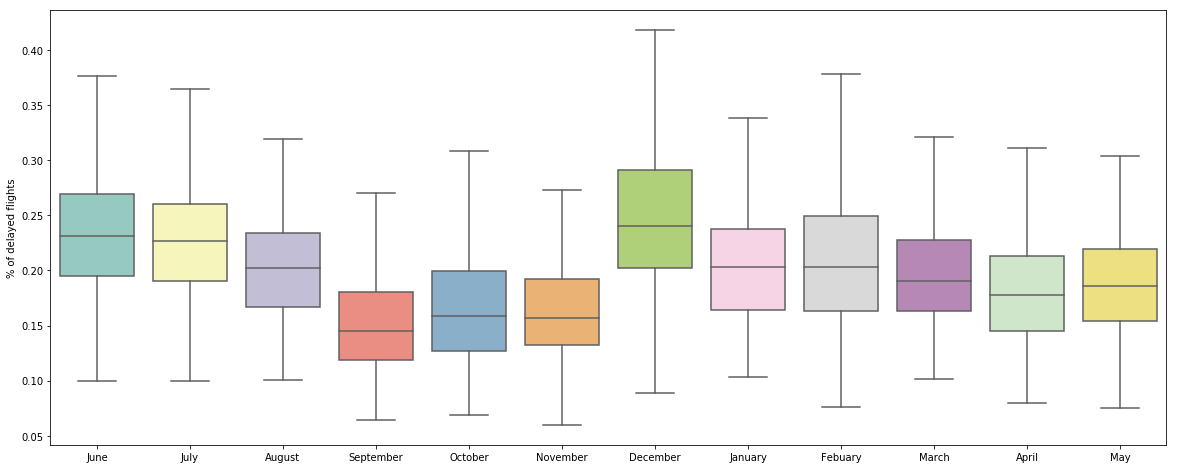

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(data['Month Name'],
           data.Delayed/data['Flights.Total'],
           ax= ax,
           showfliers = False,
           palette="Set3")
ax.set(ylabel="% of delayed flights",
      xlabel="")
plt.show()

SwarmPlot

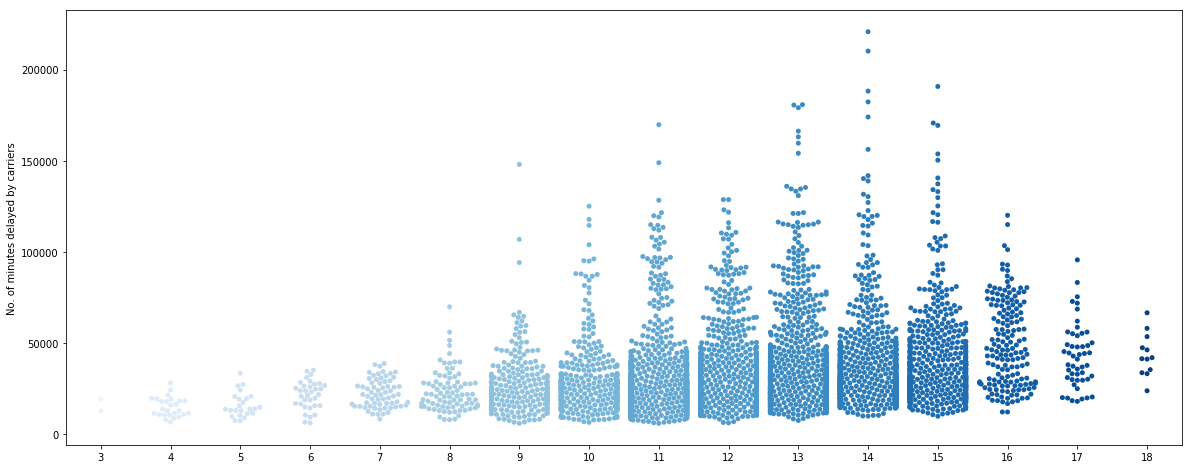

In [16]:
fig, ax = plt.subplots(figsize=(20,8))
sns.swarmplot(data["Carriers.Total"],
             data["Minutes Delayed.Carrier"],
             ax = ax,
             palette="Blues")
ax.set(ylabel="No. of minutes delayed by carriers",
      xlabel = "")
plt.show()

BarPlots

In [34]:
group_data = data[["Year","# of Delays.Carrier","# of Delays.National Aviation System", "# of Delays.Weather","Flights.Total"]].groupby("Year").sum().reset_index() 
group_data.head()

,Year,# of Delays.Carrier,# of Delays.National Aviation System,# of Delays.Weather,Flights.Total
0,2003,87163,203062,15514,2373106
1,2004,188860,410657,35484,4344735
2,2005,218705,402032,33110,4373522
3,2006,244002,417756,35307,4437952
4,2007,273234,444187,39531,4538488


In [35]:
for c in ["# of Delays.Carrier","# of Delays.National Aviation System", "# of Delays.Weather"]: 
    group_data[c] = group_data[c]/group_data["Flights.Total"] 
    group_data[c.replace("#", "%")] = group_data[c]
    del group_data[c]
group_data.head()

,Year,Flights.Total,% of Delays.Carrier,% of Delays.National Aviation System,% of Delays.Weather
0,2003,2373106,0.036730,0.085568,0.006537
1,2004,4344735,0.043469,0.094518,0.008167
2,2005,4373522,0.050007,0.091924,0.007571
3,2006,4437952,0.054981,0.094133,0.007956
4,2007,4538488,0.060204,0.097871,0.008710


In [37]:
melted = pd.melt(group_data.drop(["Flights.Total"], axis=1),
                 id_vars="Year", var_name="Delay reason",
                 value_name = "Number of Delays")

In [38]:
melted.head()

,Year,Delay reason,Number of Delays
0,2003,% of Delays.Carrier,0.036730
1,2004,% of Delays.Carrier,0.043469
2,2005,% of Delays.Carrier,0.050007
3,2006,% of Delays.Carrier,0.054981
4,2007,% of Delays.Carrier,0.060204


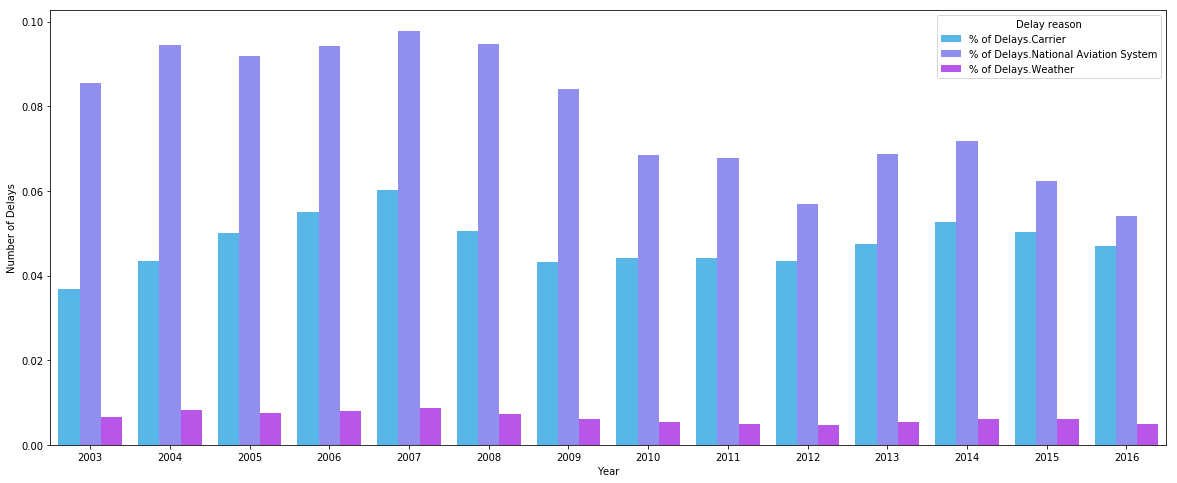

In [40]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(melted["Year"],
           melted["Number of Delays"],
           ax = ax,
           hue = melted["Delay reason"],
           palette = "cool")
plt.show()

In [43]:
t_airport = data.groupby("Code").sum().sort_values(by="Minutes Delayed.Total",
                                                  ascending=False).reset_index()["Code"]
t_airport[:10]

0    ORD
1    ATL
2    DFW
3    EWR
4    SFO
5    DEN
6    LAX
7    IAH
8    LGA
9    JFK
Name: Code, dtype: object

In [44]:
data_filtered = data[(data["Code"].isin(["ATL","ORD","DFW","EWR","SFO", "DEN","LAX","IAH","LGA"]))] 
data_filtered["Total Minutes Delayed / Total Flights"] = data_filtered["Minutes Delayed.Total"]/data_filtered["Flights.Total"] 

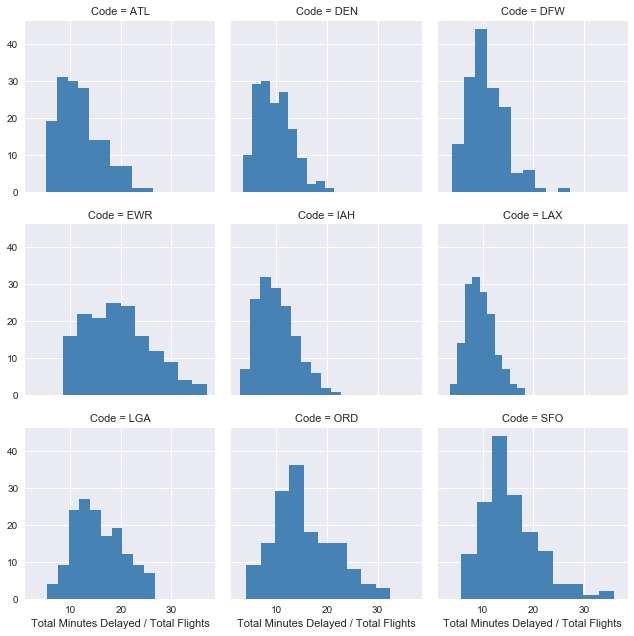

In [46]:
sns.set(style="darkgrid")
g = sns.FacetGrid(data_filtered, col="Code",
                 col_wrap=3)
g.map(plt.hist, "Total Minutes Delayed / Total Flights", color = "steelblue")
plt.show()

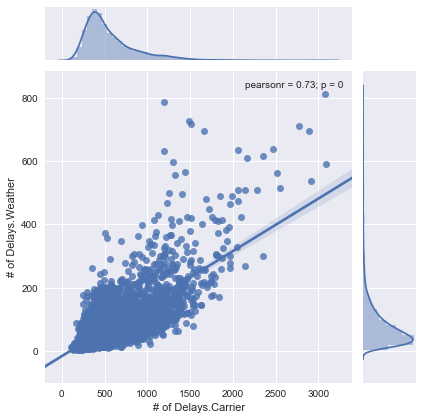

In [47]:
# Carrier vs Weather delays

sns.jointplot(x="# of Delays.Carrier",
             y="# of Delays.Weather",
             data=data,
             kind="reg")
plt.show()

<Figure size 1440x576 with 0 Axes>

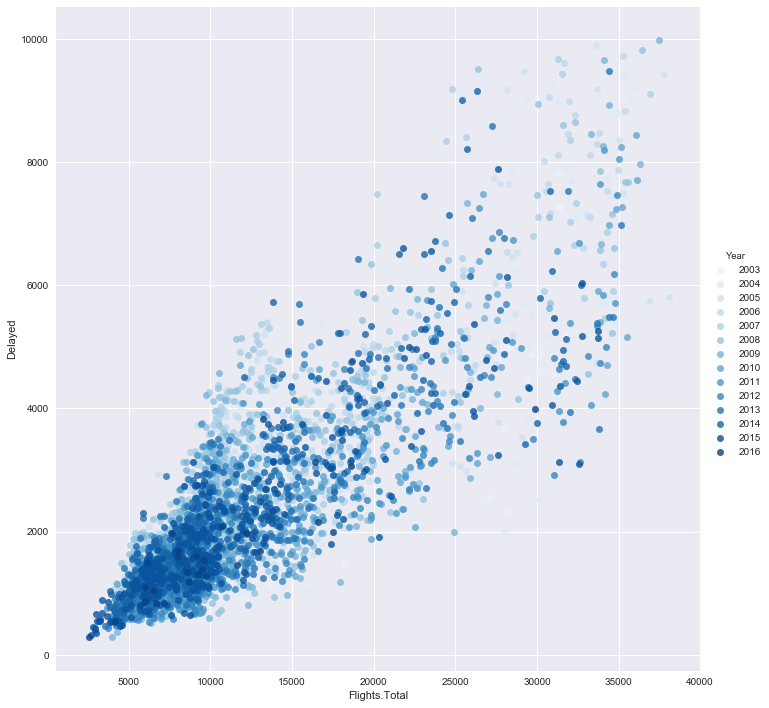

In [48]:
# scatter plot: no. of delays vs no. of flights colored by year
fig=plt.figure(figsize=(20,8))
sns.lmplot(x="Flights.Total",
          y="Delayed",
          data=data[data.Delayed<10000],
          hue="Year",
          fit_reg=False,
          size=10,
          palette="Blues")
plt.show()

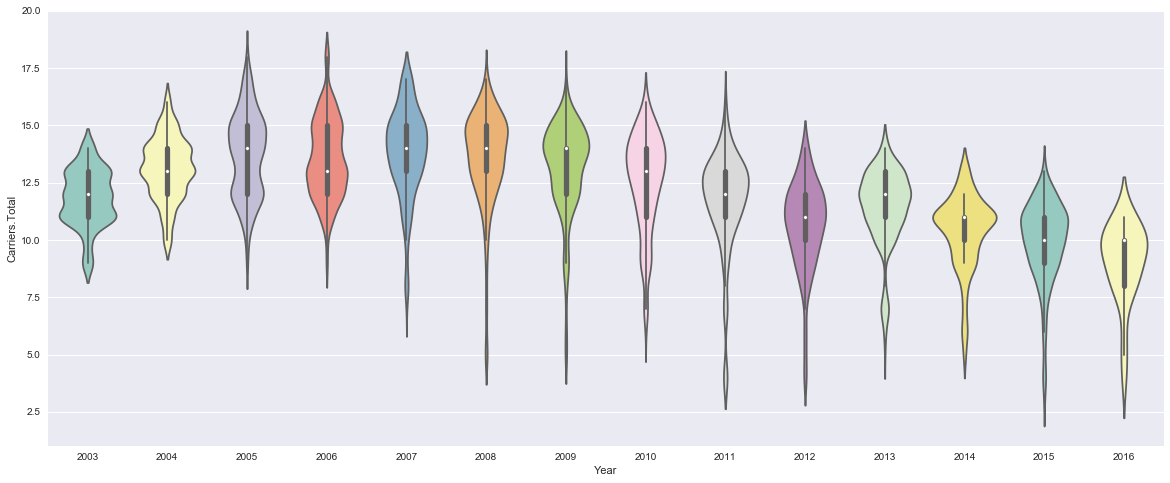

In [49]:
fig=plt.figure(figsize=(20,8))
sns.violinplot(x="Year",
              y="Carriers.Total",
              data=data,
              palette="Set3")
plt.show()